In [1]:
from sklearn.datasets import load_digits
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()

In [ ]:
print(digits.keys())

In [3]:
data = digits.data
images = digits.images
target = digits.target
target_names = digits.target_names

In [ ]:
data.dtype

In [ ]:
data.shape

In [ ]:
img = data[0].reshape(8, 8)

In [ ]:
# each datapoint is a 8x8 image
help(load_digits)

In [ ]:
plt.figure()
plt.gray()
plt.imshow(images[0], interpolation="nearest")
plt.show()

In [ ]:
plt.figure()
plt.gray()
plt.imshow(images[0], interpolation="bicubic")
plt.show()

In [4]:
X_all = data
y_all = target

X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)

In [ ]:
def euclidian_distance(a, b):
    return np.linalg.norm(b - a, ord=2)

def dist_loop(training, test):
    """Given N x D training data and M x D test data compute a matrix N x M with the distance of each pair"""
    
    N, D = training.shape
    M, D2 = test.shape
    
    assert D == D2, "different length of pixel vectors"
    
    result = np.zeros((N, M))
    
    for i in range(N):
        for j in range(M):
            result[i][j] = euclidian_distance(training[i], test[j])
    
    return result

In [ ]:
res = dist_loop(X_train, X_test)

In [ ]:
res

In [ ]:

def dist_vec(training, test):
    """Given N x D training data and M x D test data compute a matrix N x M with the distance of each pair"""
    
    N, D = training.shape
    M, D2 = test.shape
    
    assert D == D2, "different length of pixel vectors"
    
    return np.apply_along_axis(lambda training_img: 
                               np.linalg.norm(test - training_img, ord=2, axis=1), axis=1, arr=training)

In [ ]:
def dist_vec2(training, test):
    squared_diff = np.square(training[:,None] - test)
    sum_diffs = np.sum(squared_diff, axis=2)
    return np.sqrt(sum_diffs)

In [5]:
def dist_vec(training, test):
    # training is N x D matrix
    N, D = training.shape
    # test is M x D matrix
    M, D = test.shape

    result = np.empty([N, M])
    for n in range(N):
        train_element = training[n]
        result[n] = np.sqrt(np.sum(np.square(test - train_element)))

    return result

In [ ]:
np.all(dist_vec2(X_train[:10], X_test[:5]) == dist_loop(X_train[:10], X_test[:5]))

In [ ]:
%timeit dist_vec(X_train, X_test)

In [ ]:
%timeit dist_vec2(X_train, X_test)

In [ ]:
%timeit dist_vec3(X_train, X_test)

In [ ]:
%timeit dist_loop(X_train, X_test)


In [ ]:
help(np.argpartition)

In [6]:
X_train_only_3_9 = X_train[np.isin(y_train, [3,9])]
y_train_only_3_9 = y_train[np.isin(y_train, [3,9])]

X_test_only_3_9 = X_test[np.isin(y_test, [3,9])]
y_test_only_3_9 = y_test[np.isin(y_test, [3,9])]

In [7]:
def k_nearest_neighbor(X_training, Y_training, x, k):
    distances = dist_vec(X_training, np.array([x]))[:, 0]
    k_nearest_index = np.argpartition(distances, k)[:k]
    
    k_nearest_neighbors = Y_training[k_nearest_index]
    
    vote = np.bincount(k_nearest_neighbors).argmax()
    
    return vote

In [ ]:
dist_vec

In [13]:
def k_nearest_neighbor(X_training, Y_training, X_test, k):
    distances = dist_vec(X_training, X_test)
    k_nearest_index = np.argpartition(distances, k, axis=1)[:k]
    
    k_nearest_neighbors = Y_training[k_nearest_index]
    
    vote = np.bincount(k_nearest_neighbors).argmax()
    
    return vote

Help on function argpartition in module numpy:

argpartition(a, kth, axis=-1, kind='introselect', order=None)
    Perform an indirect partition along the given axis using the
    algorithm specified by the `kind` keyword. It returns an array of
    indices of the same shape as `a` that index data along the given
    axis in partitioned order.
    
    .. versionadded:: 1.8.0
    
    Parameters
    ----------
    a : array_like
        Array to sort.
    kth : int or sequence of ints
        Element index to partition by. The k-th element will be in its
        final sorted position and all smaller elements will be moved
        before it and all larger elements behind it. The order all
        elements in the partitions is undefined. If provided with a
        sequence of k-th it will partition all of them into their sorted
        position at once.
    axis : int or None, optional
        Axis along which to sort. The default is -1 (the last axis). If
        None, the flattened arra

In [ ]:
vote = np.bincount(k_nearest_neighbors).argmax()

In [ ]:
help(np.bincount)

In [ ]:
dist_vec(X_train_only_3_9[:3], y_train_only_3_9[:3])

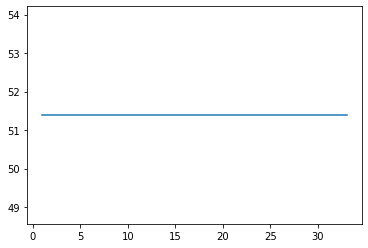

[51.388888888888886, 51.388888888888886, 51.388888888888886, 51.388888888888886, 51.388888888888886, 51.388888888888886]


In [11]:
ks = [1, 3, 5, 9, 17, 33]
errs = []

for k in ks:
    predictions = np.apply_along_axis(lambda x: k_nearest_neighbor(X_train_only_3_9, y_train_only_3_9, x, k), arr=X_test_only_3_9, axis=1)

    wrong_predictions = sum(predictions != y_test_only_3_9)
    errs.append(100 * wrong_predictions / len(y_test_only_3_9))
    
plt.plot(ks, errs)
plt.show()
print(errs)

In [9]:
predictions - y_test_only_3_9

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -6,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
ks = [1, 3, 5, 9, 17]
errs = []

for k in ks:
    predictions = np.apply_along_axis(lambda x: k_nearest_neighbor(X_train, y_train, x, k), arr=X_test, axis=1)

    wrong_predictions = sum(predictions != y_test)
    errs.append(100 * wrong_predictions / len(y_test))
    

print(errs)
plt.plot(ks, errs)
plt.show()


# 2 Cross-validation

In [14]:
def split_folds(data, labels, L):
    assert len(data) == len(labels), "lables and data must have same length"
    
    shuffled_indicies = np.random.permutation(len(data))
    
    data = data[shuffled_indicies]
    labels = data[shuffled_indicies]
    
    return np.array_split(data, L), np.array_split(labels, L)

In [ ]:
def kth_fold(data, k):
    return data[k], data[:k] + data[k+1:]


def test_classifier(X, y, L):
    X_folds, y_folds = split_folds(X, y)
    
    for i in range(len(X_folds)):
        x_test, x_train = kth_test_data(X_folds, i)
        y_test, y_train = kth_test_data(y_folds, i)
        
        

In [ ]:
classifier = KNeighborsClassifier()

In [ ]:
Ls = [2 ,5, 10]

for L in Ls:

In [ ]:
arr = [1, 2, 3, 4, 5, 6]
arr[3], arr[:3] + arr[3 + 1:]